In [1]:
# CICIDS2017数据集探索 - Friday-WorkingHours-Morning.pcap_ISCX

## 导入必要的库
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置更好的图表样式
plt.style.use('ggplot')
sns.set(style="whitegrid")

## 设置数据路径
data_dir = '/root/autodl-tmp/projects/DL/dataset/extracted/MachineLearningCVE'
# 获取所有CSV文件
csv_files = glob(os.path.join(data_dir, "*.csv"))

In [2]:
## 1. 选择文件进行详细分析 - Friday-WorkingHours-Morning.pcap_ISCX
selected_file = os.path.join(data_dir, "Friday-WorkingHours-Morning.pcap_ISCX.csv")

def load_and_explore_file(file_path):
    """加载并探索单个CSV文件"""
    print(f"\n正在分析文件: {os.path.basename(file_path)}")
    
    # 尝试使用不同的编码读取文件
    encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
    df = None
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"成功使用 {encoding} 编码读取文件")
            break
        except:
            continue
    
    if df is None:
        print("无法读取文件，请检查文件路径或格式")
        return None
    
    # 基本信息
    print("\n数据基本信息:")
    print(f"数据形状: {df.shape} (行 × 列)")
    print(f"列数量: {len(df.columns)}")
    
    return df

# 加载所选文件
df = load_and_explore_file(selected_file)


正在分析文件: Friday-WorkingHours-Morning.pcap_ISCX.csv
成功使用 utf-8 编码读取文件

数据基本信息:
数据形状: (191033, 79) (行 × 列)
列数量: 79


In [3]:
## 2. 数据预览

# 显示前几行数据
print("数据前5行:")
df.head()

数据前5行:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [4]:
## 3. 数据类型和基本统计

# 显示数据类型
print("\n数据类型信息:")
df.dtypes

# 数值列的基本统计
print("\n数值列统计摘要:")
df.describe()


数据类型信息:

数值列统计摘要:


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,191033.000000,1.910330e+05,191033.000000,191033.000000,1.910330e+05,1.910330e+05,191033.000000,191033.000000,191033.000000,191033.000000,...,191033.000000,191033.000000,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05,1.910330e+05
mean,6756.069988,1.164499e+07,13.826548,16.413714,5.999468e+02,2.838565e+04,174.715803,23.897646,51.877418,50.194023,...,10.323735,25.585407,8.596271e+04,5.382912e+04,1.834991e+05,5.589691e+04,3.917041e+06,1.750674e+05,4.048164e+06,3.745754e+06
std,16697.438823,3.070084e+07,1097.755533,1479.792387,7.924198e+03,3.314538e+06,554.475223,41.909942,117.031845,160.454532,...,1046.038121,6.380665,8.681320e+05,4.929487e+05,1.333719e+06,7.628561e+05,1.388267e+07,2.167443e+06,1.424123e+07,1.370477e+07
min,0.000000,-1.200000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.940000e+02,2.000000,1.000000,4.000000e+01,6.000000e+00,30.000000,0.000000,15.714286,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.112100e+04,2.000000,2.000000,7.000000e+01,1.520000e+02,42.000000,23.000000,38.112360,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,4.102840e+05,4.000000,2.000000,1.520000e+02,3.440000e+02,64.000000,42.000000,51.000000,20.124612,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,64948.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,5940.857143,7049.469004,...,198636.000000,56.000000,1.060000e+08,5.040000e+07,1.060000e+08,1.060000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08



缺失值情况:
Flow Bytes/s    28
dtype: int64


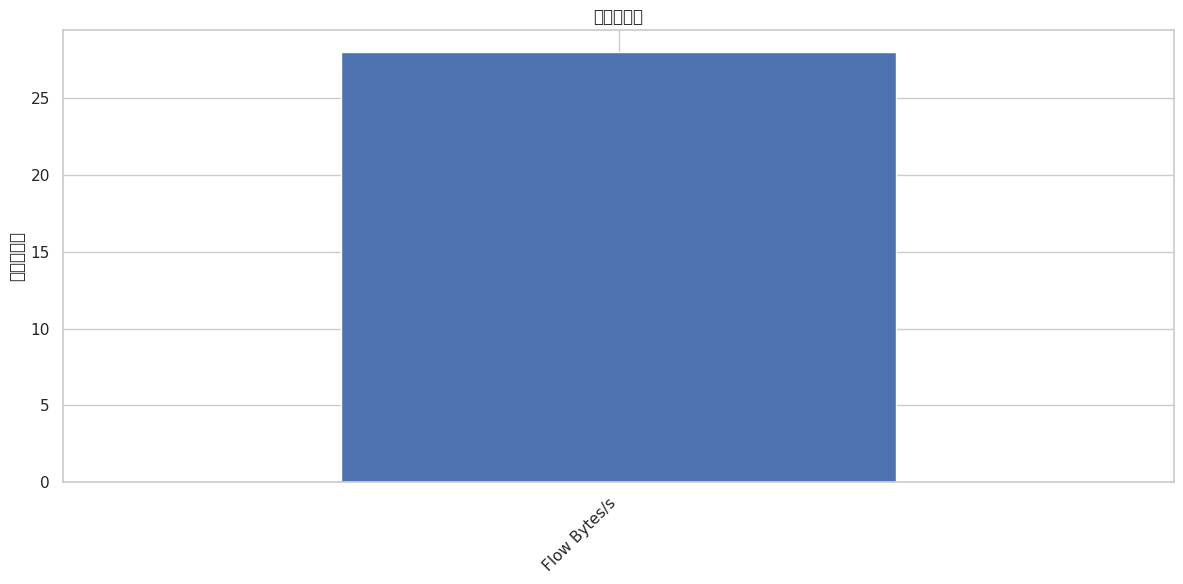


存在无穷值的列:
- Flow Bytes/s: 正无穷: 94, 负无穷: 0
-  Flow Packets/s: 正无穷: 122, 负无穷: 0


In [5]:
## 4. 检查缺失值和无穷值

# 检查缺失值
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("\n缺失值情况:")
    print(missing_values)
    
    # 可视化缺失值
    plt.figure(figsize=(12, 6))
    missing_values.plot(kind='bar')
    plt.title('缺失值分布')
    plt.ylabel('缺失值数量')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n没有发现缺失值")

# 检查无穷值
def check_infinite_values(df):
    """检查无穷值"""
    inf_count = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        pos_inf = (df[col] == np.inf).sum()
        neg_inf = (df[col] == -np.inf).sum()
        
        if pos_inf > 0 or neg_inf > 0:
            inf_count[col] = {'positive_inf': pos_inf, 'negative_inf': neg_inf}
    
    return inf_count

inf_values = check_infinite_values(df)

if inf_values:
    print("\n存在无穷值的列:")
    for col, counts in inf_values.items():
        print(f"- {col}: 正无穷: {counts['positive_inf']}, 负无穷: {counts['negative_inf']}")
else:
    print("\n没有发现无穷值")


标签分布:
BENIGN    189067
Bot         1966
Name:  Label, dtype: int64


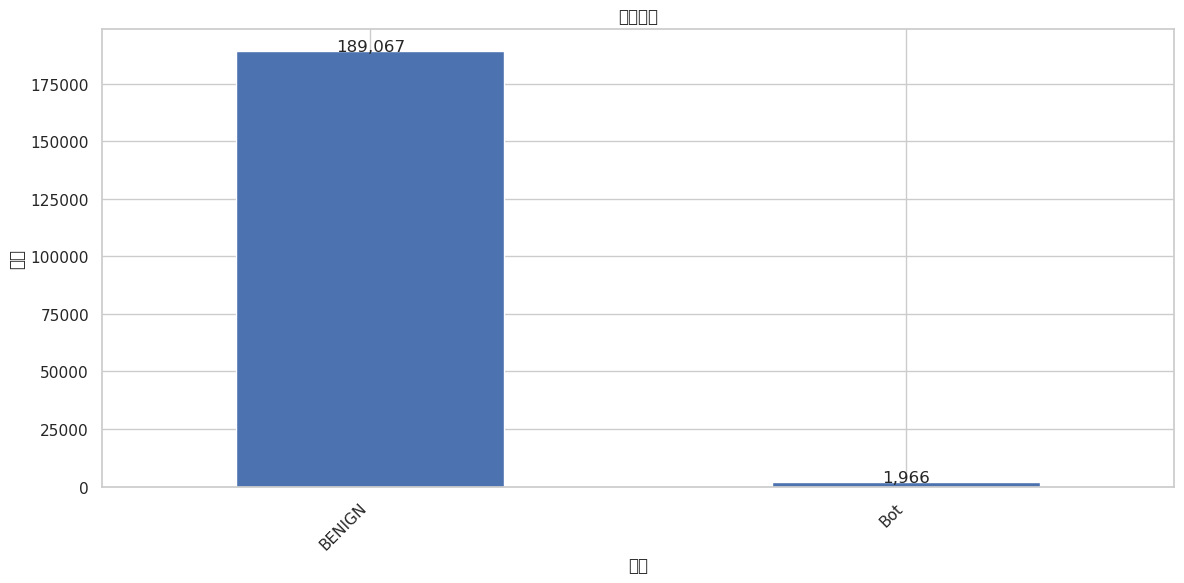

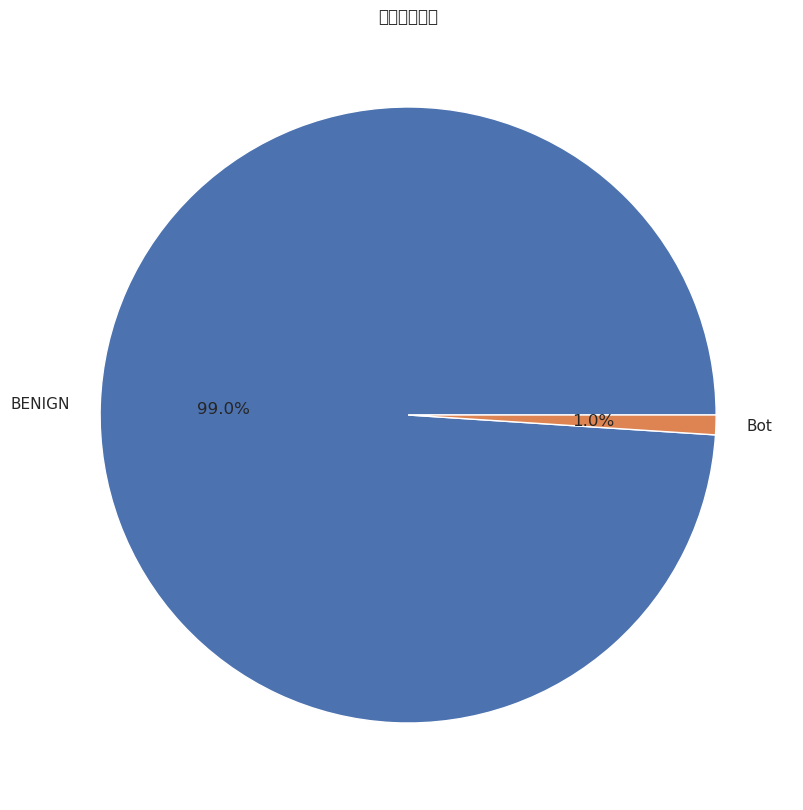

In [6]:
## 5. 标签分布分析

# 检查是否存在Label列
if ' Label' in df.columns:
    print("\n标签分布:")
    label_counts = df[' Label'].value_counts()
    print(label_counts)
    
    # 可视化标签分布
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar')
    plt.title('标签分布')
    plt.ylabel('数量')
    plt.xlabel('类别')
    plt.xticks(rotation=45, ha='right')
    
    # 在柱子上显示具体数值
    for i, v in enumerate(label_counts):
        plt.text(i, v + 10, f"{v:,}", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # 饼图显示标签分布比例
    plt.figure(figsize=(10, 10))
    label_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('标签分布比例')
    plt.ylabel('')
    plt.show()
else:
    print("\n未发现标准标签列")


只选择前15个数值特征进行相关性分析 (共 78 个)

特征相关性分析:


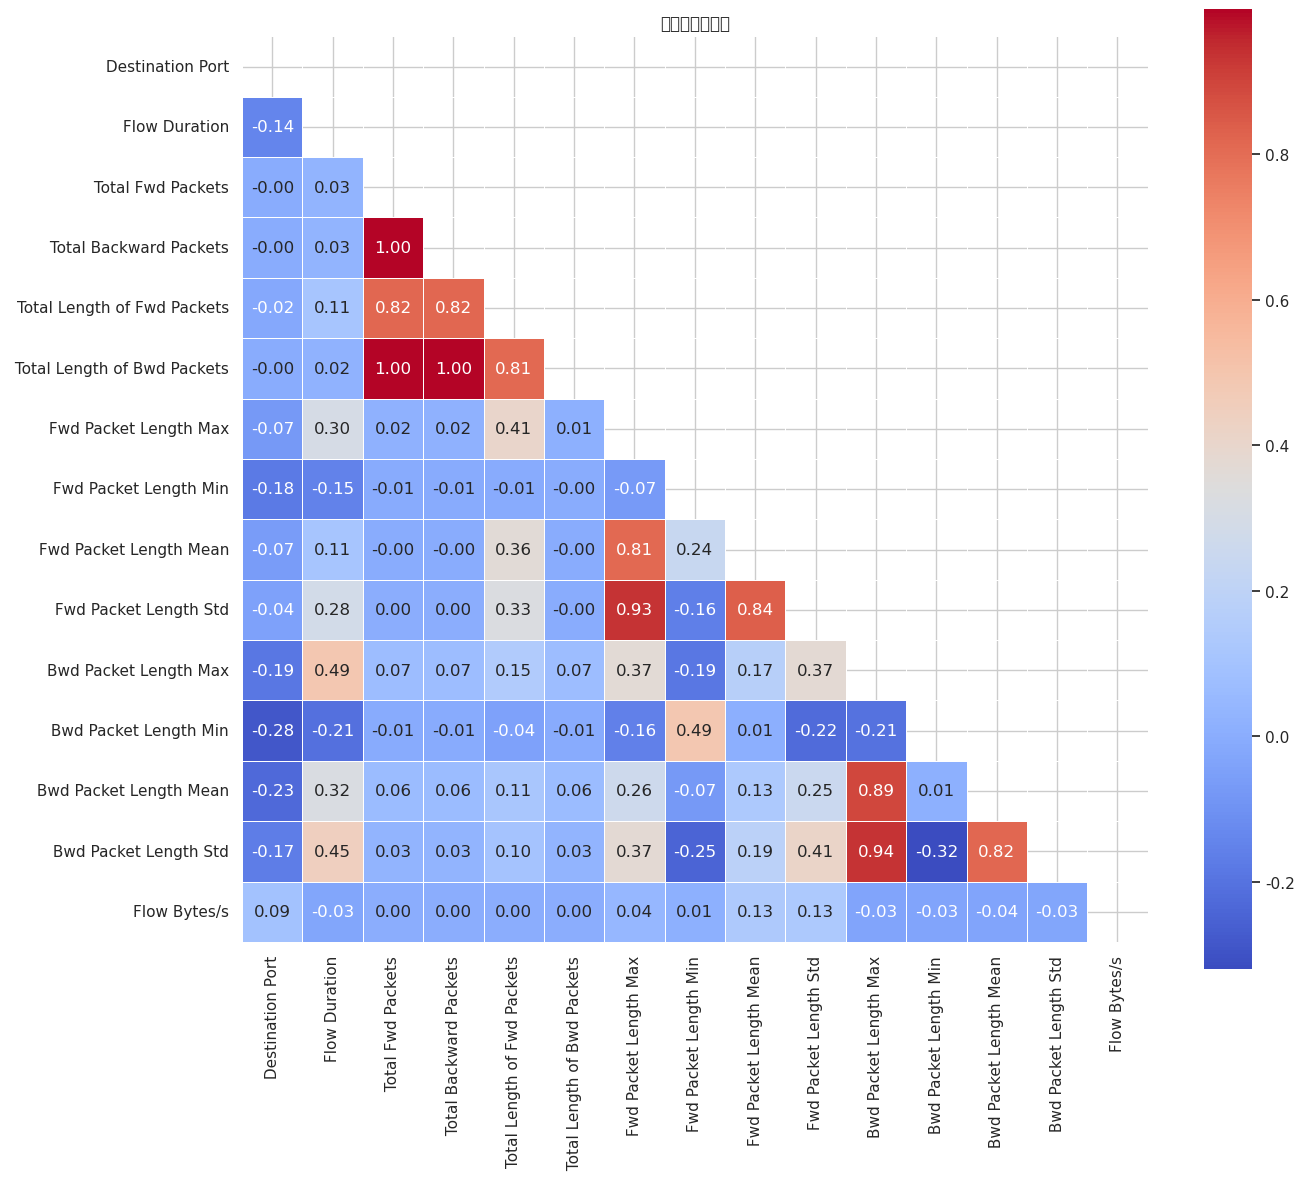


高度相关的特征对 (|相关系数| > 0.8):
-  Total Fwd Packets 和  Total Backward Packets: 1.00
-  Total Fwd Packets 和 Total Length of Fwd Packets: 0.82
-  Total Fwd Packets 和  Total Length of Bwd Packets: 1.00
-  Total Backward Packets 和 Total Length of Fwd Packets: 0.82
-  Total Backward Packets 和  Total Length of Bwd Packets: 1.00
- Total Length of Fwd Packets 和  Total Length of Bwd Packets: 0.81
-  Fwd Packet Length Max 和  Fwd Packet Length Mean: 0.81
-  Fwd Packet Length Max 和  Fwd Packet Length Std: 0.93
-  Fwd Packet Length Mean 和  Fwd Packet Length Std: 0.84
- Bwd Packet Length Max 和  Bwd Packet Length Mean: 0.89
- Bwd Packet Length Max 和  Bwd Packet Length Std: 0.94
-  Bwd Packet Length Mean 和  Bwd Packet Length Std: 0.82


In [7]:
## 6. 特征相关性分析

# 选择数值型列
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 如果数值特征过多，只选择部分
if len(numeric_cols) > 15:
    print(f"\n只选择前15个数值特征进行相关性分析 (共 {len(numeric_cols)} 个)")
    numeric_cols = numeric_cols[:15]

# 计算相关性矩阵
if len(numeric_cols) > 1:
    print("\n特征相关性分析:")
    corr = df[numeric_cols].corr()
    
    # 绘制相关性热图
    plt.figure(figsize=(14, 12))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
               square=True, linewidths=.5)
    plt.title('特征相关性热图')
    plt.tight_layout()
    plt.show()
    
    # 找出高度相关的特征
    high_corr = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    
    if high_corr:
        print("\n高度相关的特征对 (|相关系数| > 0.8):")
        for feat1, feat2, corr_val in high_corr:
            print(f"- {feat1} 和 {feat2}: {corr_val:.2f}")



特征分布分析:


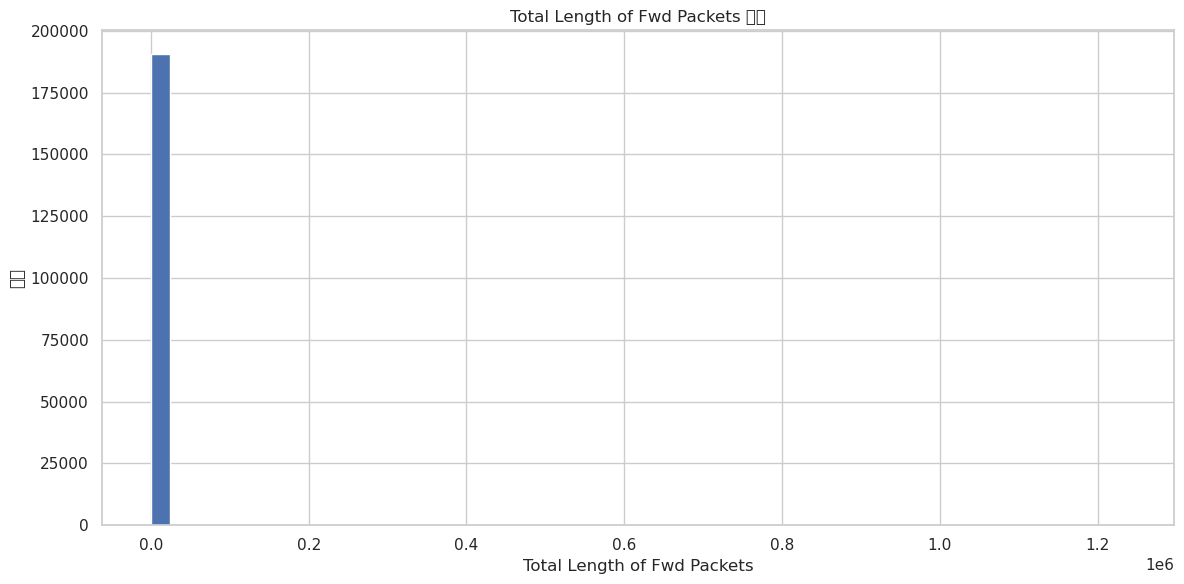

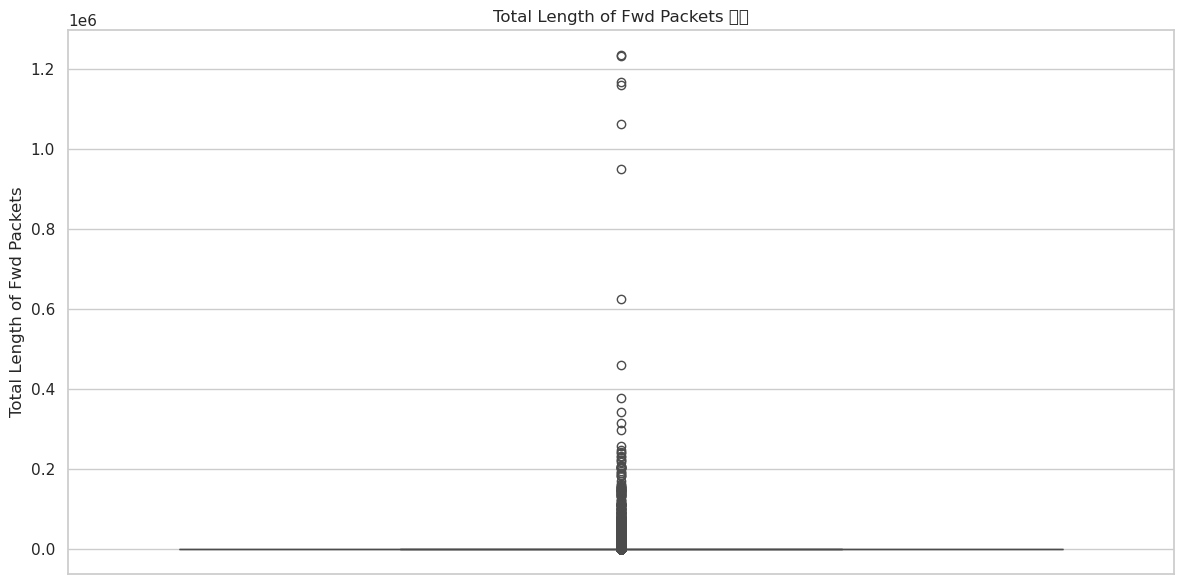

In [8]:
## 7. 特征分布分析

# 选择一些重要的数值特征进行分布分析
important_features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
                     'Total Length of Fwd Packets', 'Total Length of Bwd Packets']

# 确保这些特征确实存在
available_features = [f for f in important_features if f in df.columns]

# 如果找不到预定义的重要特征，则选择前几个数值特征
if not available_features and len(numeric_cols) > 0:
    available_features = numeric_cols[:5]  # 只取前5个

if available_features:
    print("\n特征分布分析:")
    
    # 绘制直方图
    for feature in available_features:
        plt.figure(figsize=(12, 6))
        
        # 正常数据的分布 (如果有Label列)
        if 'Label' in df.columns:
            normal_data = df[df['Label'] == 'BENIGN'][feature]
            attack_data = df[df['Label'] != 'BENIGN'][feature]
            
            plt.hist(normal_data, bins=50, alpha=0.5, label='正常')
            plt.hist(attack_data, bins=50, alpha=0.5, label='攻击')
            plt.legend()
        else:
            plt.hist(df[feature], bins=50)
        
        plt.title(f'{feature} 分布')
        plt.xlabel(feature)
        plt.ylabel('频率')
        plt.tight_layout()
        plt.show()
        
        # 箱线图
        plt.figure(figsize=(12, 6))
        if 'Label' in df.columns:
            sns.boxplot(x='Label', y=feature, data=df)
            plt.title(f'{feature} 在不同类别的分布')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.boxplot(y=feature, data=df)
            plt.title(f'{feature} 分布')
        plt.tight_layout()
        plt.show()